mini batch gradient decent

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

# loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33374683.71it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1727696.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11445906.48it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7697183.34it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Define different mini-batch sizes to test
batch_sizes = [32, 64, 128]
epochs = 10

for batch_size in batch_sizes:
    # Load train and test data samples into DataLoader with the current batch size
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Define the logistic regression model
    class LogisticRegression(torch.nn.Module):
        def __init__(self, n_inputs, n_outputs):
            super().__init__()
            self.linear = torch.nn.Linear(n_inputs, n_outputs)
        def forward(self, x):
            y_pred = torch.sigmoid(self.linear(x))
            return y_pred

    # Instantiate the model
    n_inputs = 28*28  # Makes a 1D vector of 784
    n_outputs = 10
    log_regr = LogisticRegression(n_inputs, n_outputs)

    # Define the optimizer and loss function
    optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

In [6]:
 # Lists to store loss and accuracy values
Loss = []
acc = []

# Training loop
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())

    # Calculate accuracy
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print(f'Batch size: {batch_size}. Epoch: {epoch}. Loss: {loss.item()}. Accuracy: {accuracy}')

Batch size: 128. Epoch: 0. Loss: 2.277282953262329. Accuracy: 26.48
Batch size: 128. Epoch: 1. Loss: 2.2503297328948975. Accuracy: 41.77
Batch size: 128. Epoch: 2. Loss: 2.2146732807159424. Accuracy: 52.07
Batch size: 128. Epoch: 3. Loss: 2.175783395767212. Accuracy: 59.61
Batch size: 128. Epoch: 4. Loss: 2.1775901317596436. Accuracy: 65.05
Batch size: 128. Epoch: 5. Loss: 2.1558995246887207. Accuracy: 68.58
Batch size: 128. Epoch: 6. Loss: 2.1255738735198975. Accuracy: 71.07
Batch size: 128. Epoch: 7. Loss: 2.1142735481262207. Accuracy: 72.63
Batch size: 128. Epoch: 8. Loss: 2.072009801864624. Accuracy: 73.8
Batch size: 128. Epoch: 9. Loss: 2.0681896209716797. Accuracy: 74.85


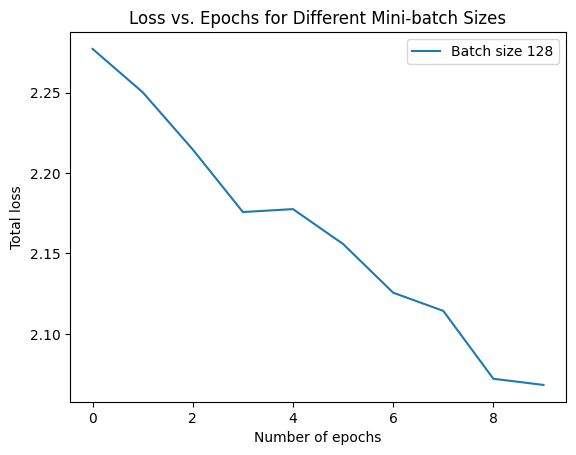

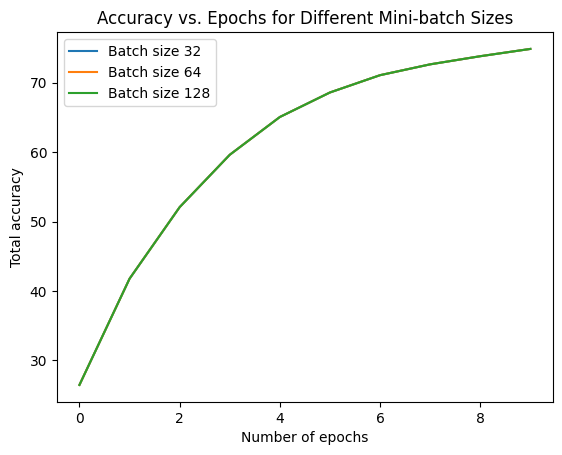

In [8]:
# Plot loss for each batch size
plt.plot(Loss, label=f'Batch size {batch_size}')

# Plotting the loss for different batch sizes
plt.xlabel("Number of epochs")
plt.ylabel("Total loss")
plt.title("Loss vs. Epochs for Different Mini-batch Sizes")
plt.legend()
plt.show()

# Plotting the accuracy for different batch sizes
for batch_size in batch_sizes:
    plt.plot(acc, label=f'Batch size {batch_size}')

plt.xlabel("Number of epochs")
plt.ylabel("Total accuracy")
plt.title("Accuracy vs. Epochs for Different Mini-batch Sizes")
plt.legend()
plt.show()